In [1]:
import pandas as pd # Para cargar el DataSet del archivo
import numpy as np # Para usar funciones matematicas

<h2 align="center">Importacion de datos y creacion del modelo</h2>

In [4]:
# Importar el set de datos del archivo 'seguro_salud.csv'
Datos_seguro = pd.read_csv("./DataSet/seguro_salud.csv", sep=",") # Indicar que el archivo tiene como deliminatores la coma (,)
Datos_seguro.head(5)

,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,1,16884.92400
1,18,0,33.770,1,0,1725.55230
2,28,0,33.000,3,0,4449.46200
3,33,0,22.705,0,0,21984.47061
4,32,0,28.880,0,0,3866.85520


In [5]:
# Verificar valores nulos en el DataFrame
print("Conteo de datos nulos:\n",Datos_seguro.isnull().sum())

# Imprimir en consola una muestra de 5 datos del DataFrame
print("Muestra de los datos:\n",Datos_seguro.sample(5))

# Describir el DataFrame
print("Descripcion:\n",Datos_seguro.describe())

Conteo de datos nulos:
 age         0
sex         0
bmi         0
children    0
smoker      0
charges     0
dtype: int64
Muestra de los datos:
       age  sex     bmi  children  smoker      charges
937    39    1  24.225         5       0   8965.79575
684    33    1  18.500         1       0   4766.02200
446    60    0  29.640         0       0  12730.99960
1028   54    0  31.600         0       0   9850.43200
924    43    0  23.200         0       0   6250.43500
Descripcion:
                age          sex          bmi     children       smoker  \
count  1338.000000  1338.000000  1338.000000  1338.000000  1338.000000   
mean     39.207025     0.494768    30.663397     1.094918     0.204783   
std      14.049960     0.500160     6.098187     1.205493     0.403694   
min      18.000000     0.000000    15.960000     0.000000     0.000000   
25%      27.000000     0.000000    26.296250     0.000000     0.000000   
50%      39.000000     0.000000    30.400000     1.000000     0.000000   


In [8]:
# Separa en conjuntos de caracteristicas y etiquertas (salidas)
# Uso de iloc: df.iloc[#filas_a_tomar,#columnas_a_tomar]
X = Datos_seguro.iloc[:,:-1].values # Caracteristicas
Y = Datos_seguro.iloc[:,-1].values # Etiquetas

In [10]:
# Dividir los datos en conjunto de entrenamiento y pruebas
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=50)

In [11]:
# Crear un modelo de regresion lineal
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()

In [12]:
# Entrenar el modelo
modelo.fit(X_train,Y_train)

LinearRegression()

<h2 align="center">Calculo de metricas</h2>

In [35]:
# Realizar predicciones con los datos de prueba
prediccion1 = modelo.predict(X_test)

In [36]:
# Calcular las metricas
from sklearn.metrics import mean_squared_error, r2_score # librerias: error_cuadratico_medio, coeficiente_de_determinacion
print("Error cuadratico medio: ",np.sqrt(mean_squared_error(Y_test,prediccion1))) # Calculo del error cuadratico medio
print("Coeficiente de determinacion: ",r2_score(Y_test,prediccion1)) # Cualculo del coeficiente de determinacion

Error cuadratico medio:  5956.754275725193
Coeficiente de determinacion:  0.7836766591357426


In [60]:
# Determinar coeficientes por cada caracteristica del DataFrame y el punto de intercepcion
print("Coeficientes: ",modelo.coef_) # Detrermina los coeficientes del modelo
print("Intercepcion: ",modelo.intercept_) # Determina el punto de intercepcion del modelo

Coeficientes:  [  251.74278905   321.85551478   297.88568293   399.94226011
 23138.81826723]
Intercepcion:  -11228.476852558188


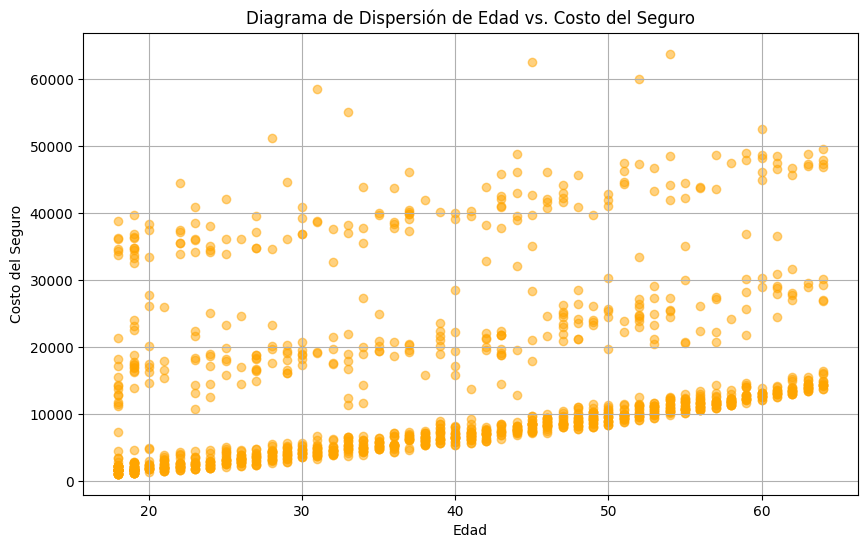

In [46]:
# Grafico de dispersion
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(Datos_seguro["age"], Datos_seguro["charges"], color='orange', alpha=0.5)
plt.title('Diagrama de Dispersión de Edad vs. Costo del Seguro')
plt.xlabel('Edad')
plt.ylabel('Costo del Seguro')
plt.grid(True)
plt.show()

<h2 align="center">Realizacion de pruebas</h2>

In [61]:
# Ecuacion del algoritmo de regresion
print("Ecuacion de regresion: ")
for i in range(len(Datos_seguro.columns)-1):
    print(Datos_seguro.columns[i],"*",modelo.coef_[i],"+",end=" ")
print(modelo.intercept_)

Ecuacion de regresion: 
age * 251.7427890472734 + sex * 321.8555147849845 + bmi * 297.885682932493 + children * 399.94226011391135 + smoker * 23138.818267228 + -11228.476852558188


In [65]:
def Ecuacion_regresion(listaValores):
    ecuacion = ""
    for i in range(len(Datos_seguro.columns)-1):
        ecuacion += str(listaValores[i])+"*"+str(modelo.coef_[i])+"+"
    ecuacion += str(modelo.intercept_)
    return eval(ecuacion)

<ul><li>Orden de los datos a pasar al modelo</li></ul>

In [19]:
Datos_seguro.columns.to_list()[:-1]

['age', 'sex', 'bmi', 'children', 'smoker']

<ul>
    <li>
        Mujer, 30 años, sin hijos, no fumador, con IBM de 30 kg/m
    </li>
</ul>

In [66]:
Datos = [
    [30, 1, 30, 0, 0] # [Edad, Género, IMC, #Hijos, Fuma]
]
Cargos_seguro = modelo.predict(Datos)
print("El cargo que se dedujo es de: $", Cargos_seguro)
print("Usando la ecuacion se obtuvo: $", Ecuacion_regresion(Datos[0]))

El cargo que se dedujo es de: $ [5582.23282162]
Usando la ecuacion se obtuvo: $ 5582.2328216197875


<ul><li>Hombre, 42 años, 3 hijos, fumador, con IBM de 45 kg/m</li></ul>

In [58]:
Datos = [
    [42, 0, 45, 3, 1] # [Edad, Género, IMC, #Hijos, Fuma]
]
Cargos_seguro = modelo.predict(Datos)
print("El cargo que se dedujo es de: $", Cargos_seguro)
print("Usando la ecuacion se obtuvo: $", Ecuacion_regresion(Datos[0]))

El cargo que se dedujo es de: $ [37088.22106696]
Usando la ecuacion se obtuvo: $ 37088.22106695922


<ul><li>Mujer, 55 años, 2 hijos, fumador, con IBM de 35 kg/m</li></ul>

In [57]:
Datos = [
    [55, 1, 35, 2, 1] # [Edad, Género, IMC, #Hijos, Fuma]
]
Cargos_seguro = modelo.predict(Datos)
print("El cargo que se dedujo es de: $", Cargos_seguro)
print("Usando la ecuacion se obtuvo: $", Ecuacion_regresion(Datos[0]))

El cargo que se dedujo es de: $ [37303.93374992]
Usando la ecuacion se obtuvo: $ 37303.93374991991
